# Pairs Bootstrapping
## Statistical Computing Notebook W9

*Tandogon, Zen Adrian | Mapúa University* | *DS122*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This function performs the bootstrapping process in arbitrary number of times to produce bootstrap replicates.

In [2]:
def get_bootstrap_data(data: np.array, size: int) -> np.array:
    x_shape = size
    y_shape = data.size
    
    if size > 1:
        bs_data = np.random.choice(data, size=(x_shape, y_shape))
    else:
        bs_data = np.random.choice(data, size=y_shape)
        
    return bs_data

### Pairs Bootstrapping

When dealing with data with multiple features, it is an important note to bootstrap the data as a whole row, not as a separate column. This means that the sampling with replacement would be from the indices of the given data. This idea is called "Pairs Bootstrapping"

Pairs Bootstrapping is useful for regression line estimation where we would infer that the true value would fall under a specific range.

For example: We wanted to estimate the values (slope and intercept) through regression between Sepal Length and Sepal Width in the Iris Dataset.

In [3]:
data = sns.load_dataset('iris')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.shape

(150, 5)

As an example, we would bootstrap the setosa species to get an estimate of their true lengths for each feature

In [6]:
sample_data = data[data['species'] == 'setosa']
sample_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The number of bootstrap replicates would be arbitrary, in this case 500. This would mean we would be plotting 500 lines that provides a range where the true slope and intercept lies based from the observation.

In [7]:
BOOTSTRAP_NUM_SAMPLES = 500

bootstrap_indices = get_bootstrap_data(sample_data.index, size=BOOTSTRAP_NUM_SAMPLES)
bootstrap_indices

array([[32, 23, 31, ...,  4, 33, 37],
       [16,  2,  5, ..., 49, 35, 16],
       [37, 44, 33, ..., 42, 26,  1],
       ...,
       [15, 16, 43, ...,  4,  1, 20],
       [16, 23, 26, ..., 26, 40, 23],
       [26, 27, 16, ..., 40, 24, 23]], dtype=int64)

In [8]:
bootstrap_indices.shape

(500, 50)

Now that we have the indices, it's time for us to get the actual values of the data. In this example, we'll be getting the `sepal_length` and `sepal_width` using the given matrix of indices.

In [9]:
sepal_length_map = np.vectorize(lambda x: sample_data['sepal_length'][x])
sepal_width_map = np.vectorize(lambda x: sample_data['sepal_width'][x])

In [10]:
sepal_length_bs_data = sepal_length_map(bootstrap_indices)
sepal_width_bs_data = sepal_width_map(bootstrap_indices)

In [11]:
sepal_length_bs_data

array([[5.2, 5.1, 5.4, ..., 5. , 5.5, 4.9],
       [5.4, 4.7, 5.4, ..., 5. , 5. , 5.4],
       [4.9, 5.1, 5.5, ..., 4.4, 5. , 4.9],
       ...,
       [5.7, 5.4, 5. , ..., 5. , 4.9, 5.4],
       [5.4, 5.1, 5. , ..., 5. , 5. , 5.1],
       [5. , 5.2, 5.4, ..., 5. , 4.8, 5.1]])

In [12]:
sepal_width_bs_data

array([[4.1, 3.3, 3.4, ..., 3.6, 4.2, 3.6],
       [3.9, 3.2, 3.9, ..., 3.3, 3.2, 3.9],
       [3.6, 3.8, 4.2, ..., 3.2, 3.4, 3. ],
       ...,
       [4.4, 3.9, 3.5, ..., 3.6, 3. , 3.4],
       [3.9, 3.3, 3.4, ..., 3.4, 3.5, 3.3],
       [3.4, 3.5, 3.9, ..., 3.5, 3.4, 3.3]])

We then get the bootstrap replicates by computing their slope and intercept for each bootstrap data. In getting the slope and intercept, `np.polyfit()` can output both of the needed bootstrap replicates.

In [13]:
bs_slopes = np.empty(BOOTSTRAP_NUM_SAMPLES)
bs_intercepts = np.empty(BOOTSTRAP_NUM_SAMPLES)

for i in range(BOOTSTRAP_NUM_SAMPLES):
    slope, intercept = np.polyfit(sepal_length_bs_data[i], sepal_width_bs_data[i], deg=1)
    bs_slopes[i] = slope
    bs_intercepts[i] = intercept

We would also need to get the original slope and intercept from the observed data.

In [14]:
original_slope, original_intercept = np.polyfit(sample_data['sepal_length'], sample_data['sepal_width'], deg=1)

After which, we would plot a regression line for each pair of slope and intercept

Text(0.5, 1.0, 'Regression Fitting with Bootstrap Estimation')

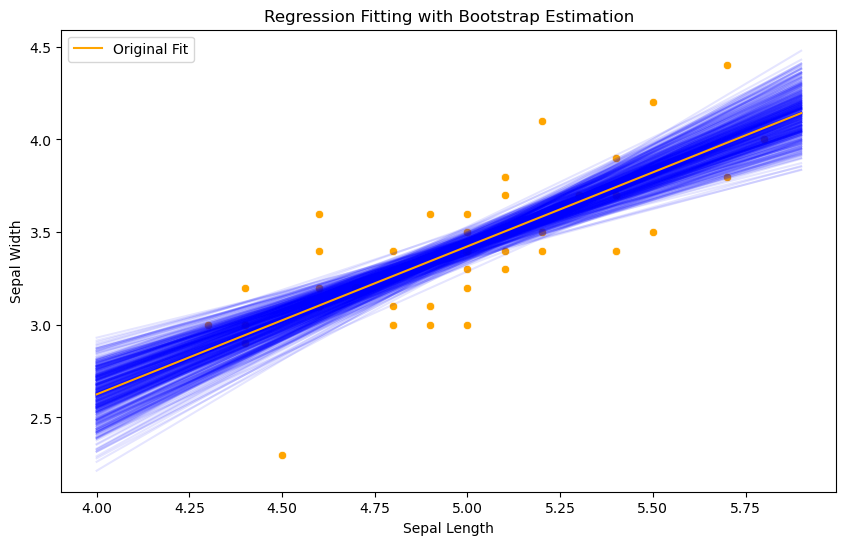

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

x_data = np.arange(4, 6, 0.1)

for slope, intercept in zip(bs_slopes, bs_intercepts):
    sns.lineplot(x=x_data, y=slope*x_data+intercept, alpha=0.1, errorbar=None, color='blue', ax=ax)
    
sns.lineplot(x=x_data, y=original_slope*x_data+original_intercept, errorbar=None, color='orange', label='Original Fit', ax=ax)
sns.scatterplot(data=sample_data, x='sepal_length', y='sepal_width', color='orange', ax=ax)

ax.legend()

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Regression Fitting with Bootstrap Estimation')

The idea behind pairs bootstrapping is to give an estimate of where the true value (of slope and intercept for regression) if we sample the whole population of iris. Since we only have a sample and a bootstrap sample, we can only provide a given range of where would it fall under.

Dry Beans Pair

In [16]:
beans_data = pd.read_csv('dry_beans.csv')

In [17]:
beans_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,69892,1052.973,389.855771,228.671466,1.704873,0.809910,71139,298.310674,0.684270,0.982471,0.792142,0.765182,0.005578,0.001180,0.585504,0.998209,BARBUNYA
1,34584,704.813,272.448363,161.972223,1.682068,0.804091,34940,209.842123,0.678171,0.989811,0.874857,0.770209,0.007878,0.001710,0.593222,0.997839,DERMASON
2,72102,1072.061,377.616730,243.503876,1.550763,0.764314,73400,302.990293,0.708452,0.982316,0.788348,0.802375,0.005237,0.001339,0.643806,0.998390,BARBUNYA
3,207673,1755.004,659.273337,405.169271,1.627155,0.788863,210788,514.215398,0.733687,0.985222,0.847293,0.779973,0.003175,0.000725,0.608358,0.989893,BOMBAY
4,200116,1773.379,636.108126,402.325059,1.581080,0.774577,202634,504.772825,0.773419,0.987574,0.799629,0.793533,0.003179,0.000777,0.629695,0.995598,BOMBAY


In [18]:
def get_bootstrap_data(data: np.array, size: int) -> np.array:
    x_shape = size
    y_shape = data.size
    
    if size > 1:
        bs_data = np.random.choice(data, size=(x_shape, y_shape))
    else:
        bs_data = np.random.choice(data, size=y_shape)
        
    return bs_data

In [19]:
pair1_data = beans_data[['Area', 'Perimeter']]
pair2_data = beans_data[['Compactness', 'MinorAxisLength']]

In [20]:
BOOTSTRAP_NUM_SAMPLES = 500

In [25]:
bootstrap_indices_pair1 = get_bootstrap_data(pair1_data.index.values, size=BOOTSTRAP_NUM_SAMPLES)
bootstrap_indices_pair2 = get_bootstrap_data(pair2_data.index.values, size=BOOTSTRAP_NUM_SAMPLES)

pair1_feature1_bs_data = np.vectorize(lambda x: pair1_data['Area'].iloc[x])(bootstrap_indices_pair1)
pair1_feature2_bs_data = np.vectorize(lambda x: pair1_data['Perimeter'].iloc[x])(bootstrap_indices_pair1)

pair2_feature1_bs_data = np.vectorize(lambda x: pair2_data['Compactness'].iloc[x])(bootstrap_indices_pair2)
pair2_feature2_bs_data = np.vectorize(lambda x: pair2_data['MinorAxisLength'].iloc[x])(bootstrap_indices_pair2)

bs_slopes_pair1 = np.empty(BOOTSTRAP_NUM_SAMPLES)
bs_intercepts_pair1 = np.empty(BOOTSTRAP_NUM_SAMPLES)

for i in range(BOOTSTRAP_NUM_SAMPLES):
    slope, intercept = np.polyfit(pair1_feature1_bs_data[i], pair1_feature2_bs_data[i], deg=1)
    bs_slopes_pair1[i] = slope
    bs_intercepts_pair1[i] = intercept

bs_slopes_pair2 = np.empty(BOOTSTRAP_NUM_SAMPLES)
bs_intercepts_pair2 = np.empty(BOOTSTRAP_NUM_SAMPLES)

for i in range(BOOTSTRAP_NUM_SAMPLES):
    slope, intercept = np.polyfit(pair2_feature1_bs_data[i], pair2_feature2_bs_data[i], deg=1)
    bs_slopes_pair2[i] = slope
    bs_intercepts_pair2[i] = intercept

original_slope_pair1, original_intercept_pair1 = np.polyfit(pair1_data['Area'], pair1_data['Perimeter'], deg=1)
original_slope_pair2, original_intercept_pair2 = np.polyfit(pair2_data['Compactness'], pair2_data['MinorAxisLength'], deg=1)

Pair 1

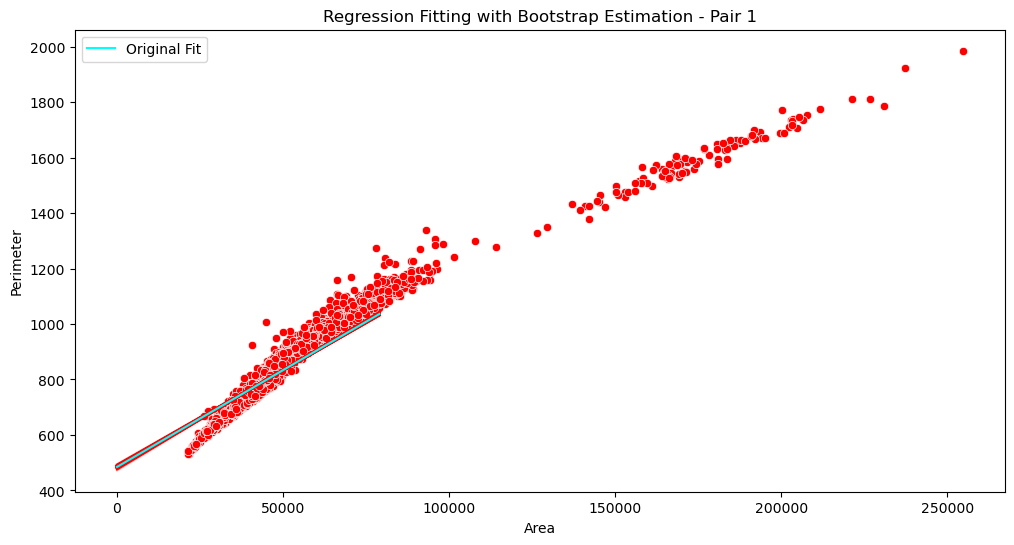

In [28]:
fig, ax1 = plt.subplots(figsize=(12, 6))

x_data_pair1 = np.arange(0, 80000, 1000)

for slope, intercept in zip(bs_slopes_pair1, bs_intercepts_pair1):
    sns.lineplot(x=x_data_pair1, y=slope*x_data_pair1+intercept, alpha=0.1, errorbar=None, color='red', ax=ax1)

sns.lineplot(x=x_data_pair1, y=original_slope_pair1*x_data_pair1+original_intercept_pair1, errorbar=None, color='cyan', label='Original Fit', ax=ax1)
sns.scatterplot(data=pair1_data, x='Area', y='Perimeter', color='red', ax=ax1)

ax1.legend()
ax1.set_xlabel('Area')
ax1.set_ylabel('Perimeter')
ax1.set_title('Regression Fitting with Bootstrap Estimation - Pair 1')

plt.show()

Pair 2

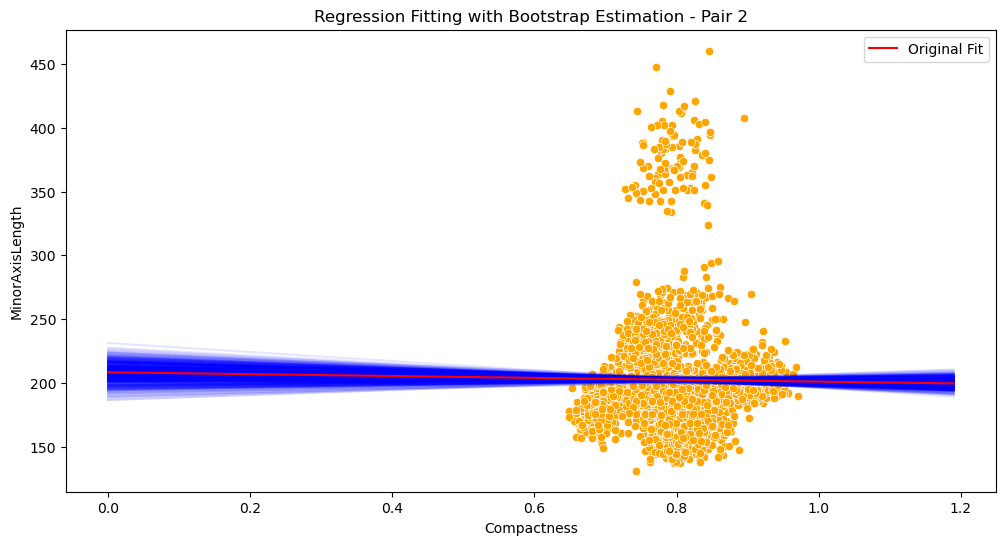

In [27]:
fig, ax2 = plt.subplots(figsize=(12, 6))

x_data_pair2 = np.arange(0, 1.2, 0.01)

for slope, intercept in zip(bs_slopes_pair2, bs_intercepts_pair2):
    sns.lineplot(x=x_data_pair2, y=slope*x_data_pair2+intercept, alpha=0.1, errorbar=None, color='blue', ax=ax2)

sns.lineplot(x=x_data_pair2, y=original_slope_pair2*x_data_pair2+original_intercept_pair2, errorbar=None, color='red', label='Original Fit', ax=ax2)
sns.scatterplot(data=pair2_data, x='Compactness', y='MinorAxisLength', color='orange', ax=ax2)

ax2.legend()
ax2.set_xlabel('Compactness')
ax2.set_ylabel('MinorAxisLength')
ax2.set_title('Regression Fitting with Bootstrap Estimation - Pair 2')

plt.show()


---

<h3><center>END OF FILE</center></h3>

---

**The software is provided "as is", without warranty of any kind, express or implied, including but not limited to the warranties of merchantability, fitness for a particular purpose and noninfringement. in no event shall the authors or copyright holders be liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, arising from, out of or in connection with the software or the use or other dealings in the software.**